### 代表的な確率分布
#### ベルヌーイ分布
確率質量関数は
$$
Bern(x|\theta)=\theta^x(1-\theta)^{1-x}
$$
となる。$\theta\in(0,1)$は$x=1$となる確率を表すパラメータである。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

d = stats.bernoulli(0.6)

In [3]:
# サンプリング
X = d.rvs(100)
X

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [4]:
# 確率質量関数の値
print(d.pmf(0), d.pmf(1))

0.4 0.6


<BarContainer object of 2 artists>

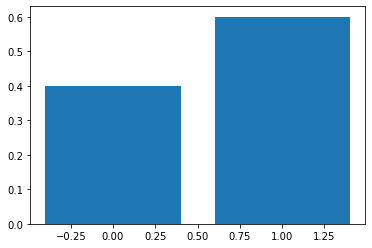

In [5]:
plt.bar([0,1], d.pmf([0,1]))

In [6]:
print(d.mean(), d.var())

0.6 0.24


#### カテゴリ分布
試行回数$N=1$の多項分布とも呼ばれる。
頻度を与えるパラメータ$\boldsymbol{\pi}=(\pi_0,\cdots,\pi_{K-1})^T$に応じて$x\in\{0,\cdots,K-1\}$が決定される。(ただし$\pi_k>0$かつ$\sum_{k=0}^{K-1}\pi_k=1$)
$$
Cat(x|\boldsymbol{\pi})=\pi_k
$$

In [18]:
# N=1の多項分布
cat_dist = stats.multinomial(1, [0.1,0.2,0.3,0.4])

K = len(cat_dist.p)

X_onehot = cat_dist.rvs(200)
print(X_onehot[:3])

X = np.argmax(X_onehot, axis=1)
print(X)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]]
[2 2 3 1 3 2 2 1 3 3 3 3 1 3 2 1 3 3 1 2 2 1 2 3 3 3 3 2 2 0 0 3 3 3 3 3 3
 3 3 3 3 3 1 2 1 1 3 1 1 1 1 2 3 1 2 3 3 3 3 3 3 3 2 3 2 3 2 3 0 3 3 1 1 3
 2 3 2 2 3 3 2 0 3 1 2 2 3 1 0 3 3 3 3 1 3 2 3 3 1 3 2 2 2 0 0 2 2 2 2 2 3
 3 0 3 3 2 2 3 3 0 1 1 3 2 3 1 0 3 2 3 0 3 2 3 2 2 3 1 2 3 3 2 3 2 3 0 3 0
 3 1 3 2 3 3 1 3 2 2 3 1 3 2 3 1 1 2 1 3 1 2 2 3 3 2 0 3 2 2 3 0 1 3 0 2 2
 2 1 3 0 2 3 3 1 1 0 2 2 2 3 2]


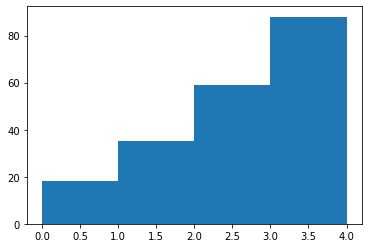

In [19]:
plt.hist(X, bins=range(K+1));

In [22]:
X_tmp = np.identity(K)[range(K)]
X_tmp

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<BarContainer object of 4 artists>

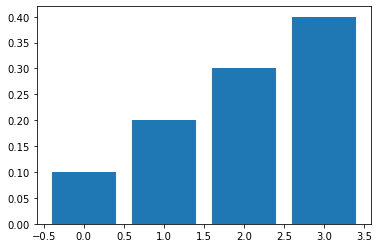

In [26]:
plt.bar(range(K), cat_dist.pmf(X_tmp))

#### 二項分布
ベルヌーイ分布の多試行版である。
$$
Bin(x|\theta,N)=\begin{pmatrix}N\\x\end{pmatrix}\theta^x(1-\theta)^{N-x}
$$

In [27]:
N = 8
theta = 0.2
bin_dist = stats.binom(N, theta)

X = bin_dist.rvs(100)
X

array([2, 4, 1, 4, 4, 2, 3, 0, 1, 2, 1, 3, 2, 1, 1, 0, 4, 3, 1, 3, 2, 2,
       1, 1, 1, 5, 2, 2, 1, 1, 2, 3, 4, 3, 1, 0, 0, 2, 1, 0, 0, 3, 3, 3,
       1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 3, 2,
       2, 2, 2, 4, 2, 2, 3, 0, 3, 2, 1, 2, 1, 2, 3, 1, 3, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2])

average =  1.66
variance =  1.2644


(array([14., 35., 30., 14.,  6.,  1.,  0.,  0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 8 artists>)

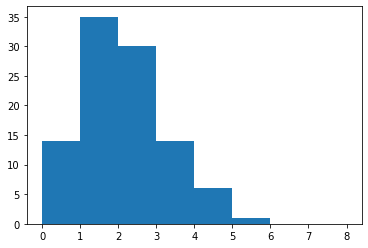

In [28]:
print('average = ', str(np.mean(X)))
print('variance = ', str(np.var(X)))
plt.hist(X, range(N+1))

<BarContainer object of 9 artists>

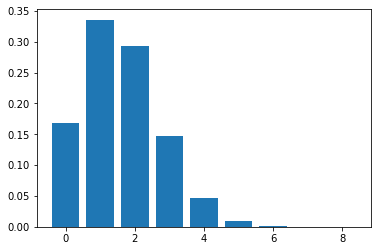

In [30]:
ar = np.arange(0,N+1)
plt.bar(ar, bin_dist.pmf(ar))

#### ポアソン分布
自然数$x=0,1,2,\cdots$に関する分布である。パラメータは$\mu\in R^+$である。
$$
Poi(x|\mu)=\frac{\mu^x\exp(-\mu)}{x!}
$$


In [31]:
poi_dist = stats.poisson(3.0)

X = poi_dist.rvs(100)
X

array([2, 1, 4, 4, 3, 8, 2, 3, 3, 2, 1, 3, 4, 3, 3, 4, 3, 3, 2, 4, 0, 4,
       7, 3, 3, 0, 1, 6, 4, 6, 1, 4, 5, 2, 3, 2, 4, 1, 3, 5, 3, 2, 3, 1,
       5, 3, 0, 0, 2, 2, 3, 3, 6, 2, 1, 5, 3, 2, 1, 2, 3, 1, 3, 3, 4, 1,
       1, 2, 1, 7, 3, 4, 3, 1, 3, 2, 3, 2, 5, 5, 3, 5, 3, 2, 3, 0, 3, 3,
       0, 7, 1, 1, 3, 3, 1, 0, 8, 2, 0, 0])

average =  2.8
variance =  3.2199999999999993


(array([ 9., 16., 17., 32., 11.,  7.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

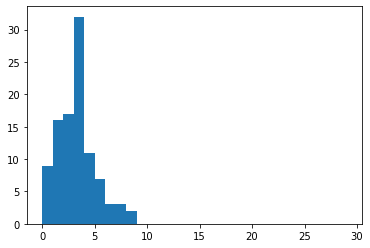

In [34]:
print('average = ', str(np.mean(X)))
print('variance = ', str(np.std(X)**2))
plt.hist(X, range(30))

<BarContainer object of 30 artists>

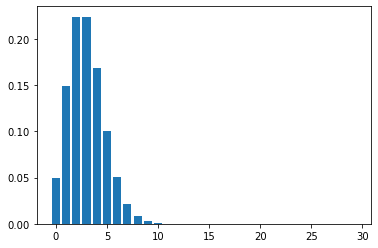

In [35]:
ar = np.arange(0,30)
plt.bar(ar, poi_dist.pmf(ar))

#### 一様分布
$b>a$を満たす2つの実数値パラメータに対して、$x\in (a,b)$を満たす実数値をランダムに生成する。
$$
Unif(x|a,b)=\frac{1}{b-a}
$$

In [36]:
uni_dist = stats.uniform(2, 5-2)
X = uni_dist.rvs(100)
X

array([2.08961723, 3.00510824, 4.11995411, 4.43140543, 3.08944612,
       4.04889105, 2.8475137 , 3.20999363, 2.43967566, 3.80674886,
       4.07189053, 2.32304796, 2.29767644, 3.70583922, 2.39664811,
       2.68810329, 3.39847792, 4.37169695, 3.14721636, 4.55519475,
       3.60148017, 3.0132244 , 2.75992851, 2.12706299, 3.18295178,
       2.77586141, 3.37928603, 3.3828466 , 3.85389259, 4.96019338,
       4.20975825, 4.27977797, 4.78920614, 3.40497248, 3.97926399,
       2.52266145, 4.24835193, 2.63650788, 2.41986308, 4.85894057,
       4.35677333, 3.98867745, 2.98238589, 2.03380619, 4.35322298,
       2.68582789, 3.18095492, 2.62704001, 4.63055576, 4.79887075,
       2.24780577, 2.13312448, 4.11173274, 2.1456307 , 2.66678172,
       2.75744733, 2.17754345, 4.88982608, 2.09469085, 2.0250791 ,
       3.33712624, 2.35023532, 3.03158567, 2.2047196 , 4.39812089,
       3.61009539, 3.43830044, 3.99711098, 4.06087158, 3.24229545,
       3.719942  , 2.1089138 , 4.70744674, 4.58830224, 2.41156

(array([13., 10., 11.,  9., 12.,  5., 10., 13.,  7., 10.]),
 array([2.0250791 , 2.31933273, 2.61358637, 2.90784   , 3.20209363,
        3.49634727, 3.7906009 , 4.08485453, 4.37910816, 4.6733618 ,
        4.96761543]),
 <BarContainer object of 10 artists>)

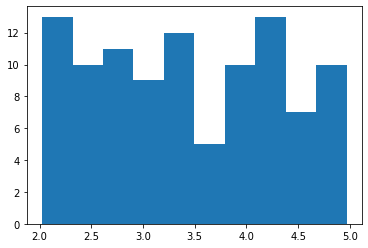

In [37]:
plt.hist(X, bins=10)

#### 1次元ガウス分布(正規分布)
パラメータは平均$\mu\in R$および標準偏差$\sigma\in R^+$の2つである。
$$
N(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}\exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2} \bigg)
$$

(array([  9.,  22.,  59., 149., 238., 228., 186.,  74.,  29.,   6.]),
 array([-3.21026174, -2.57695553, -1.94364931, -1.3103431 , -0.67703688,
        -0.04373067,  0.58957554,  1.22288176,  1.85618797,  2.48949418,
         3.1228004 ]),
 <BarContainer object of 10 artists>)

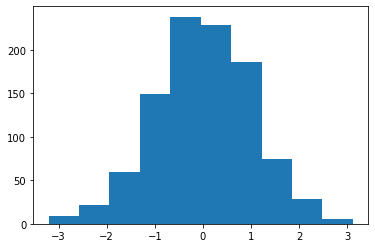

In [38]:
normal_dist = stats.norm(0.0, 1.0)
X = normal_dist.rvs(1000)
plt.hist(X, bins=10)

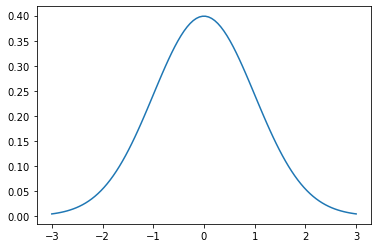

In [42]:
ls = np.linspace(-3, 3, 100)
plt.plot(ls, normal_dist.pdf(ls))

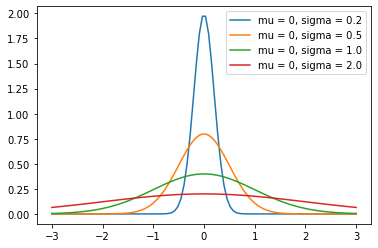

In [43]:
mu = 0
sigma_list = [0.2, 0.5, 1.0, 2.0]
for sigma in sigma_list:
    normal_dist = stats.norm(mu, sigma)
    plt.plot(ls, normal_dist.pdf(ls), label='mu = '+str(mu)+', sigma = '+str(sigma))
plt.legend()

#### 多次元ガウス分布
1次元ガウス分布を、より一般的な$D>1$次元に拡張したものが多次元ガウス分布である。
$$
N(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Sigma})=\frac{1}{\sqrt{(2\pi)^D|\boldsymbol{\Sigma}|}}\exp\big(-(\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}) \big)
$$
ここで、$\boldsymbol{\mu}$は平均ベクトル、$\boldsymbol{\Sigma}$は共分散行列と呼ばれる。

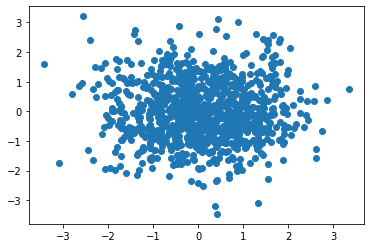

In [45]:
mu = [0,0]
Sigma = [[1.0,0.0],
         [0.0, 1.0]]
mvn_dist = stats.multivariate_normal(mu, Sigma)

X = mvn_dist.rvs(1000)

plt.scatter(X[:,0], X[:,1])

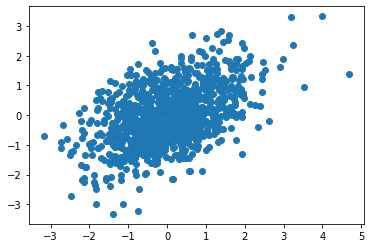

In [55]:
mu = [0,0]
Sigma = [[1.0,0.5],
         [0.5, 1.0]]
mvn_dist = stats.multivariate_normal(mu, Sigma)

X = mvn_dist.rvs(1000)

plt.scatter(X[:,0], X[:,1])

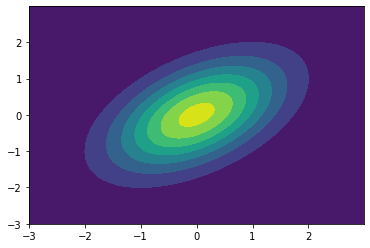

In [58]:
x1, x2 = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x1, x2))
plt.contourf(x1, x2, mvn_dist.pdf(pos))

#### ベータ分布
$x\in (0,1)$を満たす実数値を生成する分布。パラメータは$\alpha\in R^+,\beta\in R^+$の2つでる。
$$
Beta(x|\alpha,\beta)=\frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}
$$
$B(\alpha,\beta)$は分布を正規化するための定数値である。

(array([393.,  42.,  22.,  20.,  18.,  25.,  19.,  31.,  34., 396.]),
 array([1.22321517e-27, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

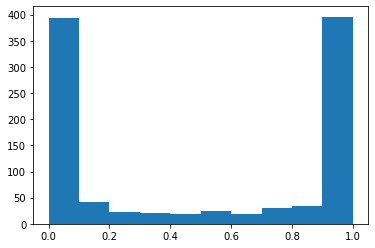

In [59]:
beta_dist = stats.beta(0.1, 0.1)
X = beta_dist.rvs(1000)

plt.hist(X, bins=10)

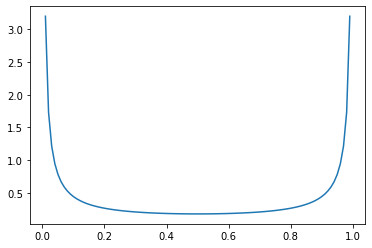

In [60]:
ls = np.linspace(0, 1, 100)
plt.plot(ls, beta_dist.pdf(ls))

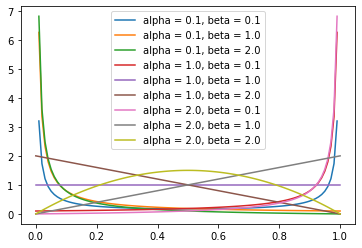

In [62]:
ls = np.linspace(0, 1, 100)

alpha_list = [0.1, 1.0, 2.0]
beta_list = [0.1, 1.0, 2.0]
for alpha in alpha_list:
    for beta in beta_list:
        beta_dist = stats.beta(alpha, beta)
        plt.plot(ls, beta_dist.pdf(ls), label='alpha = '+str(alpha)+', beta = '+str(beta))
plt.legend()

#### ディリクレ分布
ベータ分布の多次元版であり、$\sum_{k=1}^Kx_k=1$を満たすような実数値の$k$次元ベクトル$\boldsymbol{x}$を生成する。
パラメータは各要素が$\alpha_k\in R^+$となるような$K$次元の実数ベクトル$\boldsymbol{\alpha}$である。
$$
Dir(\boldsymbol{x}|\boldsymbol{\alpha})=\frac{1}{D(\boldsymbol{\alpha})}\prod_{k=1}^Kx_k^{\alpha_k-1}
$$

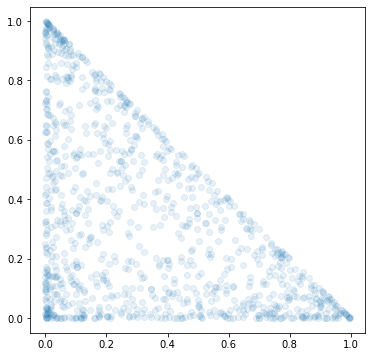

In [63]:
dir_dist = stats.dirichlet([0.5, 0.5, 0.5])
X = dir_dist.rvs(1000)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=.1)

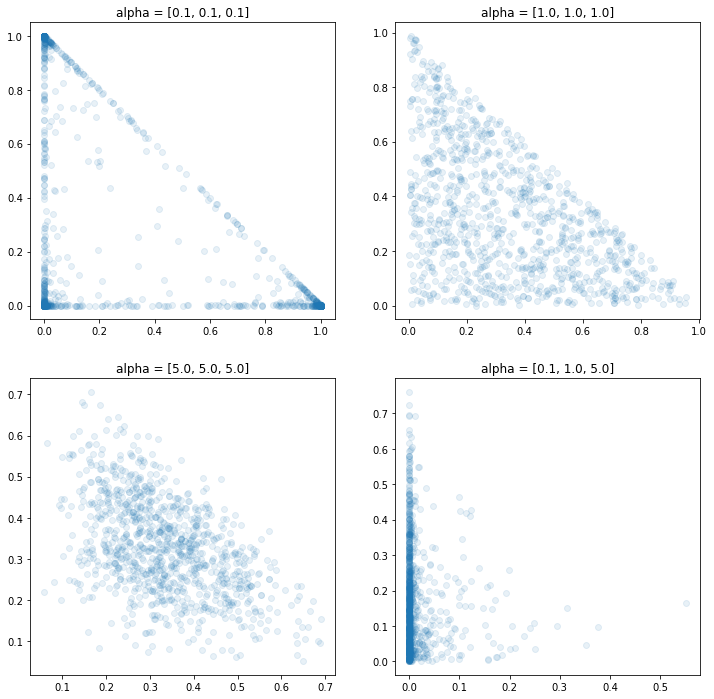

In [64]:
alpha_list = [[0.1,0.1,0.1],[1.0,1.0,1.0],[5.0,5.0,5.0],[0.1,1.0,5.0]]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for (i, ax) in enumerate(axes.ravel()):
    alpha = alpha_list[i]
    dir_dist = stats.dirichlet(alpha)
    X = dir_dist.rvs(1000)
    ax.scatter(X[:,0], X[:,1], alpha=.1)
    ax.set_title('alpha = '+str(alpha))

#### ガンマ分布
$x\in R^+$を満たす実数値を生成する分布である。
パラメータは$\alpha\in R^+$、スケールパラメータ$\theta\in R^+$の2つである。
$$
Gam(x|\alpha,\theta)=\frac{1}{G(\alpha,\theta)}x^{\alpha-1}\exp(-x/\theta)
$$
$\alpha=1$とした場合は指数分布と呼ばれる。

(array([540., 247., 101.,  55.,  32.,  11.,   6.,   4.,   3.,   1.]),
 array([8.00915559e-04, 7.95564973e-01, 1.59032903e+00, 2.38509309e+00,
        3.17985715e+00, 3.97462120e+00, 4.76938526e+00, 5.56414932e+00,
        6.35891338e+00, 7.15367743e+00, 7.94844149e+00]),
 <BarContainer object of 10 artists>)

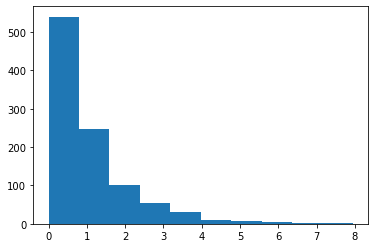

In [65]:
alpha = 1.0
theta = 1.0
gamma_dist = stats.gamma(a=alpha, scale=theta)

X = gamma_dist.rvs(1000)
plt.hist(X, bins=10)

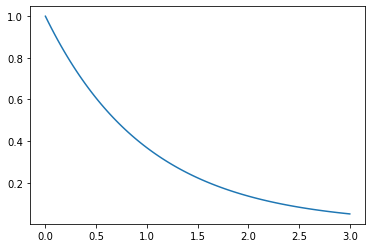

In [66]:
ls = np.linspace(0, 3, 100)
plt.plot(ls, gamma_dist.pdf(ls))

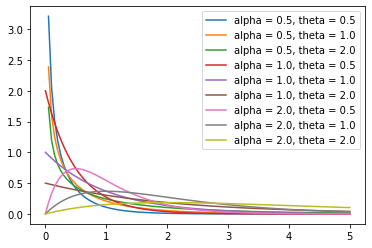

In [67]:
ls = np.linspace(0,5,100)

alpha_list = [0.5,1.0,2.0]
theta_list = [0.5,1.0,2.0]
for alpha in alpha_list:
    for theta in theta_list:
        gamma_dist = stats.gamma(a=alpha, scale=theta)
        plt.plot(ls, gamma_dist.pdf(ls), label='alpha = '+str(alpha)+', theta = '+str(theta))
plt.legend()

#### 混合モデル
ベルヌーイ分布とガウス分布を組み合わせることを考える。データ数を$N$とする。
各データに対して次のような変数$\boldsymbol{Z}=\{z_1,z_2,\cdots,z_N\}$がベルヌーイ分布から生成されると仮定する。
$$
z_n\sim Bern(0.3)\hspace{3mm}for\hspace{3mm}n=1,2,\cdots,N
$$
さらに、変数$\boldsymbol{X}=\{x_1,x_2,\cdots,x_N\}$は、対応する$\boldsymbol{Z}$に応じて次のように2種類の異なるガウス分布から発生すると仮定する。
$$
x_n\sim N(1.0,0.5)\hspace{3mm}if\hspace{3mm}z_n=0\\
x_n\sim N(-1.0,0.5)\hspace{3mm}if\hspace{3mm}z_n=1
$$

In [68]:
mu = 0.3
d1 = stats.norm(1.0, 0.5)
d2 = stats.norm(-1.0, 1.0)

N = 10000
Z = np.zeros(N)
X = np.zeros(N)

for n in range(N):
    Z[n] = stats.bernoulli(mu).rvs()
    if Z[n] == 0:
        X[n] = d1.rvs()
    else:
        X[n] = d2.rvs()

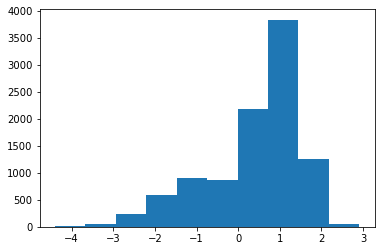

In [70]:
plt.hist(X, bins=10);

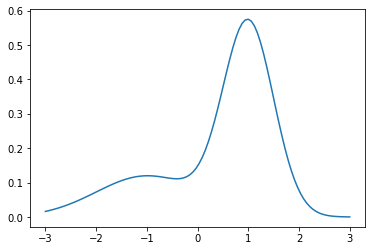

In [71]:
def mixture_pdf(mu, d1, d2, x):
    return (1.0 - mu)*d1.pdf(x) + mu*d2.pdf(x)

ls = np.linspace(-3, 3, 100)
plt.plot(ls, mixture_pdf(mu, d1, d2, ls))

#### 回帰モデル
ベイジアンモデリングでは、関数を生成する統計モデルのことを回帰モデルと呼ぶ。
1次関数を生成するモデルを考える。
$$
y=ax+b
$$
ここでは、1次関数を生成するために、関数のパラメータ$a$および$b$に分布を与える。
ここでは、次のように適当な平均及び標準偏差のパラメータを設定したガウス分布によって、$a$および$b$が生成されると仮定する。
$$
a\sim N(0,1.0)\\
b\sim N(0,1.0)
$$

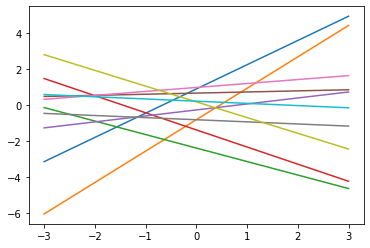

In [73]:
N = 10

ls = np.linspace(-3, 3, 100)
plt.figure()
for i in range(N):
    a = stats.norm(0,1).rvs()
    b = stats.norm(0,1).rvs()
    plt.plot(ls, a*ls+b)

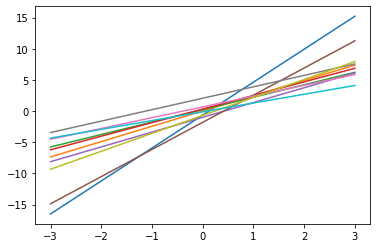

In [74]:
N = 10

ls = np.linspace(-3, 3, 100)
plt.figure()
for i in range(N):
    a = stats.gamma(1,1).rvs()
    b = stats.norm(0,1).rvs()
    plt.plot(ls, a*ls+b)

ガンマ分布を使用することで、傾きが正の値の関数しか生成されなくなる。
他にも、$y=ax+b$のような定義式自体を修正することによって、より工夫を凝らした関数を生成することが可能である。
例えば、次のような指数関数を予測に使うことはよくあり、これは一般化線形モデルでも用いられる。
$$
y=\exp(ax+b)
$$
この場合も、パラメータ$a$および$b$に適当な分布を設定する。
$$
a\sim N(0,1.0)\\
b\sim N(0,1.0)
$$

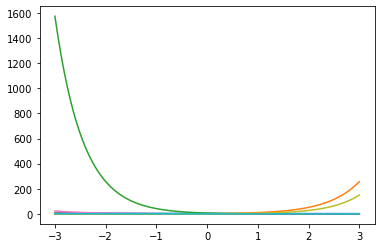

In [75]:
plt.figure()
for i in range(N):
    a = stats.norm(0,1).rvs()
    b = stats.norm(0,1).rvs()
    plt.plot(ls, np.exp(a*ls+b))

### 近似推論手法
#### マルコフ連鎖モンテカルロ法(MCMC)
パラメータの事後分布を明示的に求める代わりに、事後分布に従う乱数を得ることで分布の性質を確認する手法である。
事後分布に従うサンプルを得ることで、例えば事後分布の平均値など関心がある統計量を求めることができる。
#### マルコフ連鎖
確率変数の系列$\boldsymbol{z}^{(i)},\cdots,\boldsymbol{z}^{(M)}$において、1つ前の値(状態)$\boldsymbol{z}^{(t-1)}$に基づき、次の値(状態)$\boldsymbol{z}^{(t)}$が決まる場合、この系列を(1次)マルコフ連鎖と呼ぶ。
これは、確率変数の系列$\boldsymbol{z}^{(i)},\cdots,\boldsymbol{z}^{(M)}$について、$p(\boldsymbol{z}^{(t)}|\boldsymbol{z}^{(1)},\cdots,\boldsymbol{z}^{(t-1)})=p(\boldsymbol{z}^{(t)}|\boldsymbol{z}^{(t-1)})$が成り立つことを意味する。ここで、$p(\boldsymbol{z}^{(t)}|\boldsymbol{z}^{(t-1)})$を遷移確率と呼ぶ。

次のような遷移確率を考える。

||(t-1)|A|B|C|
|-|-|-|-|-|
||A|0.2|0.1|0.1|
|(t)|B|0.3|0.5|0.3|
||C|0.5|0.4|0.6|

次の時点における分布は$\boldsymbol{\pi}^{(1)}=\boldsymbol{T}\boldsymbol{\pi}^{(0)}$と表せる。

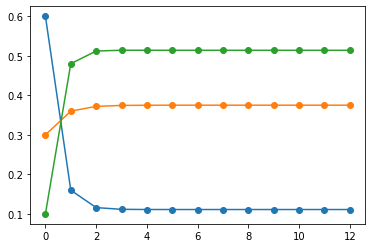

In [96]:
T = np.array([[0.2,0.1,0.1],
              [0.3,0.5,0.3],
              [0.5,0.4,0.6]])

pi = np.array([[0.6,0.3,0.1]]).T

pi_list = np.array(pi)
for _ in range(12):
    pi = T@pi
    pi_list = np.concatenate([pi_list, pi], axis=1)

plt.plot(pi_list.T, '-o');

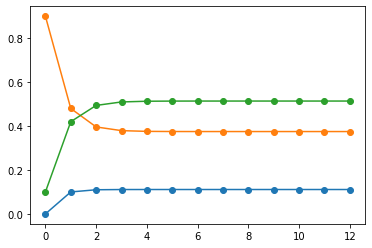

In [95]:
pi = np.array([[0.0,0.9,0.1]]).T

pi_list = np.array(pi)
for _ in range(12):
    pi = T@pi
    pi_list = np.concatenate([pi_list, pi], axis=1)

plt.plot(pi_list.T, '-o');

マルコフ連鎖において十分な期間の経過後、変化しなくなった$\boldsymbol{\pi}$を定常分布と呼ぶ。
また、初期値にかかわらず、定常分布に収束する性質をエルゴード性と呼ぶ。

#### モンテカルロ法
モンテカルロ法は乱数を用いた数値計算法の総称である。
例えば、モンテカルロ積分では、以下により期待値の積分計算を近似できる。
ここで、$I$は関数$f(z)$の確率分布$p(z)$の下での期待値である。また、$z_1,\cdots,z_M$は確率分布$p(z)$に従う乱数である。
この式は、$p(z)$に関する積分計算を$p(z)$から得た乱数を用いて近似できることを示す。
$$
I=\int f(z)p(z) dz \approx \frac{1}{M}\sum_{m=1}^Mf(z_m)
$$

例として、平均0、標準偏差1のガウス分布$N(0,1)$の確率密度関数$f(z)$の$[-2,2]$の区間での積分を計算する。
$$
P=\int_{-2}^2f(z)dz
$$
$p(z)$を$[-2,2]$での一様分布とすると、$p(z)=\frac{1}{4}(-2\leq z \leq 2)$となるため、$z_m$を$p(z)$に従う乱数として、
$$
I=\int_{-2}^2f(z)\frac{1}{4}dz\approx \frac{1}{M}\sum_{m=1}^Mf(z_m)
$$
より、
$$
P\approx \frac{4}{M}\sum_{m=1}^Mf(Z_m)
$$
で積分を近似計算できることがわかる。

ground truth: 0.9545
M = 100, estimation: 0.9574 ± 0.0426
M = 1000, estimation: 0.9520 ± 0.0144
M = 10000, estimation: 0.9548 ± 0.0048
M = 100000, estimation: 0.9543 ± 0.0015


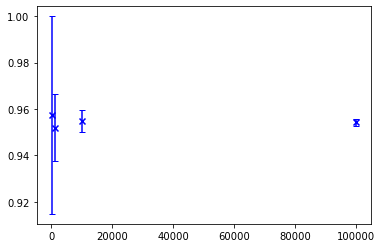

In [99]:
def montecarlo(M, trial=100, seed=1):
    """M個のサンプルによるモンテカルロ法をtrial回繰り返し、推定値の平均と標準偏差を返す"""
    np.random.seed(seed)
    x = np.random.uniform(-2, 2, (M, trial))
    res = 4 * stats.norm(0, 1).pdf(x).mean(axis=0)
    return res.mean(), res.std()

ground_truth = stats.norm(0, 1).cdf(2) - stats.norm(0, 1).cdf(-2)
print(f'ground truth: {ground_truth:.4f}')

M_list = [100, 1000, 10000, 100000]
fig, ax = plt.subplots()
for M in M_list:
    m, s = montecarlo(M)
    print(f'M = {M}, estimation: {m:.4f} ± {s:.4f}')
    ax.scatter(M, m, c='b', marker='x')
    ax.errorbar(M, m, s, capsize=3, c='b')

#### MCMCのアルゴリズム
MCMCでは興味あるパラメータの事後分布が定常分布になるように、マルコフ連鎖の遷移確率を設計し、目標分布からのサンプルを取得する。
目標分布を$p^*(\boldsymbol{z})$と表すと、任意の$\boldsymbol{z},\boldsymbol{z}'$について、以下を満たすような遷移確率$T(\boldsymbol{z},\boldsymbol{z}')=p(\boldsymbol{z}'|\boldsymbol{z})$を用いると、マルコフ連鎖が目標分布に収束することが知られている。
$$
p^*(\boldsymbol{z})T(\boldsymbol{z},\boldsymbol{z}')=p^*(\boldsymbol{z}')T(\boldsymbol{z}',\boldsymbol{z})
$$
これは、詳細つり合い条件と呼ばれる。
#### メトロポリス・ヘイスティングス法(HM法)
詳細つり合い条件を満たす遷移確率を直接設計することは困難である。
そこで、メトロポリス・ヘイスティングス法では提案分布$q(\boldsymbol{z}|\boldsymbol{z}')$を導入する。
提案分布は適当に選んだ確率分布であるため、そのままでは詳細つり合い条件を満たさない。
そこで、提案分布から得られたサンプルをメトロポリス・ヘイスティングス基準と呼ばれる判定法に従い受容または棄却することで、詳細つり合い条件が満たされるようになり、目標分布に従うサンプルを得ることができる。

1. 提案分布$q(\cdot|\boldsymbol{z}^{(t)})$からサンプル点の候補$\boldsymbol{z}_*$をサンプリングする
2. 提案された点$\boldsymbol{z}_*$を次の式の確率で受容し(メトロポリス・ヘイスティングス基準)、$\boldsymbol{z}^{(t+1)}=\boldsymbol{z}_*$とする。提案が棄却された場合、$\boldsymbol{z}^{(t+1)}=\boldsymbol{z}^{(t)}$とする。
$$
p(\boldsymbol{z}^{(t+1)}|\boldsymbol{z}^{(t)})=\min\bigg(1,\frac{\tilde{p}(\boldsymbol{z}_*)q(\boldsymbol{z}^{(t)}|\boldsymbol{z}_*)}{\tilde{p}(\boldsymbol{z}^{(t)})q(\boldsymbol{z}_*|\boldsymbol{z}^{(t)})} \bigg)
$$

ここで$\tilde{p}(\boldsymbol{z}_*)$は正規化されていない事後分布を表している。
提案される値は、1つ前の値に撹乱項$\varepsilon$を加算したものとなる。
なお、提案分布$q(\cdot|\boldsymbol{z}^{(t)})$が$\boldsymbol{z}^{(t)}$に関して対象の場合、$q(\boldsymbol{z}^{(t)}|\boldsymbol{z}_*)=q(\boldsymbol{z}_*|\boldsymbol{z}^{(t)})$となるため、以下のような簡単な式となる。
$$
p(\boldsymbol{z}^{(t+1)}|\boldsymbol{z}^{(t)})=\min\bigg(1,\frac{\tilde{p}(\boldsymbol{z}_*)}{\tilde{p}(\boldsymbol{z}^{(t)})} \bigg)
$$
#### ハミルトニアン・モンテカルロ法(HMC法)
ＭＨ法では提案する値を、目標分布とは関係なくランダムに生成していた。
ハミルトニアン・モンテカルロ法は(正規化されていない)確率密度関数の勾配を用いることで、効率的にサンプリングを行うMCMC法である。
斜面におけるボールの運動を考える。斜面は目標分布の負の対数確率密度で定められている。
斜面上の任意の初期位置にボールをおき、ランダムな強さで弾く。しばらくの間、ボールを斜面上で転がし、一定の時間の経過後にボールを止める。この際のボールの位置がサンプルの候補点となる。提案を受容するかどうかは、メトロポリス・ヘイスティングス基準で決める。
ボールを斜面上で動かす際の軌道のシミュレーションには、リープフロッグ法と呼ばれる数値積分法を用いる。
リープフロッグ法では、時刻$\epsilon$経過後のボールの位置と運動量を計算するステップを$L$回繰り返すことで、時刻$\epsilon L$先の位置$\boldsymbol{z}_*$および運動量$\boldsymbol{p}_*$を得ることができる。

1. 運動量$\boldsymbol{p}\sim N(\boldsymbol{0},\sigma^2\boldsymbol{I})$
2. リープフロッグ法により現在の点$(\boldsymbol{z}^{(t)},\boldsymbol{p})$から次のサンプルの候補$(\boldsymbol{z}_*,\boldsymbol{p}_*)$を得る
3. 提案された点$\boldsymbol{z}_*$を次の式の確率で受容し(メトロポリス・ヘイスティングス基準)、$\boldsymbol{z}^{(t+1)}=\boldsymbol{z}_*$とする。提案が棄却された場合、$\boldsymbol{z}^{(t+1)}=\boldsymbol{z}^{(t)}$とする。
$$
p(\boldsymbol{z}^{(t+1)}|\boldsymbol{z}^{(t)})=\min\bigg(1,\frac{\tilde{p}(\boldsymbol{z}_*)q(\boldsymbol{z}^{(t)}|\boldsymbol{z}_*)}{\tilde{p}(\boldsymbol{z}^{(t)})q(\boldsymbol{z}_*|\boldsymbol{z}^{(t)})} \bigg)
$$

#### その他のMCMCアルゴリズム
NUTS(No U-Turn Sampler)はHMC法を改良したアルゴリズムである。
HMC法では斜面上でボールを運動させる際、ハイパーパラメータの設定によってはボールが元の位置の近くに戻ってきてしまうことがある。
NUTSではこの非効率なUターンを避けるため、サンプリング中にステップ数$L$を調整するといった工夫がなされる。

また、レプリカ交換モンテカルロ法はパラレル。テンパリングとも呼ばれ、HMC法と同じく物理学の分野で提案された方法である。
レプリカ交換法では「温度」という概念を導入することで、複数のピークを持つような事後分布から効率的にサンプリングができる。

#### MCMCの具体例
ガウス分布の平均パラメータに関する推論という簡単な例でMCMCによる推論の具体的な進め方を確認する。
平均$\mu$、標準偏差$1.0$のガウス分布からの100個のサンプルからなるデータ$\boldsymbol{X}=\{x_1,\cdots,x_{100}\}$が得られたとき、平均$\mu$の事後分布$p(\mu|\boldsymbol{X})$を推論する。
平均$\mu$に関する事前知識はないとして、事前分布は平均0、標準偏差10のガウス分布とする。
$$
\begin{align}
x_n|\mu&\sim N(x_n|\mu,1.0^2),\hspace{3mm}n=1,\cdots,100\\
\mu&\sim N(\mu|0,10^2)
\end{align}
$$

この場合、$\mu$の事後分布もガウス分布となり、解析的に求めることができる。
これは$\mu$の事前分布として設定したガウス分布が、平均未知のガウス分布モデルに対する共役事前分布と呼ばれる特別な事前分布であるためである。

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

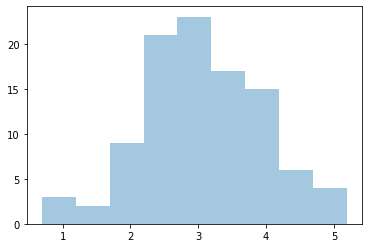

In [100]:
import seaborn as sns

n_sample = 100
true_mean = 3.0
true_sd = 1.0

np.random.seed(1)

data = np.random.normal(true_mean, true_sd, n_sample)

sns.distplot(data, kde=False)

これまでの記載と統一するため、$\boldsymbol{z}=\mu$に記号を置き換えて表記する。
ランダムウォークMH法を採用するとして、提案分布$q(\cdot|\boldsymbol{z}^{(t)}=N(\boldsymbol{z}^{(t)},\sigma\boldsymbol{I})$とする。
$\sigma$はステップサイズなどと呼ばれるパラメータである。ここでは、$\sigma=0.3$とし、$\boldsymbol{z}$の初期値は$\boldsymbol{0}$とする。

In [117]:
n_iter = 6000
step_size = 0.3
z_init = 0.0

x_current = z_init
posterior = []
n_accepted = 0

def unnormalized_log_posterior(z):
    likelihood = stats.norm(z, true_sd).logpdf(data).sum()
    prior = stats.norm(0, 10).logpdf(z)
    return prior + likelihood

In [118]:
from tqdm.notebook import tqdm

np.random.seed(1)

for i in tqdm(range(n_iter)):
    # 撹乱項εは平均０の一様分布に従うとする
    x_proposal = x_current + step_size * np.random.uniform(-1, 1)

    logp_current = unnormalized_log_posterior(x_current)
    logp_proposal = unnormalized_log_posterior(x_proposal)
    # [0, 1]の一様分布からのサンプル
    r = np.random.rand()
    # メトロポリス・ヘイスティングス基準に従い、提案された値を受容するかどうか判定
    # logp_proposal > logp_currentなら必ず受容
    # logp_proposal < logp_currentの場合は、np.exp(logp_proposal - logp_current)の確率で受容
    if np.exp(logp_proposal - logp_current) > r:
        n_accepted += 1
        x_current = x_proposal
    posterior.append(x_current)

print('acceptance ratio: {:.3f}'.format(n_accepted / n_iter))

  0%|          | 0/6000 [00:00<?, ?it/s]

acceptance ratio: 0.489


Text(0, 0.5, '$z$')

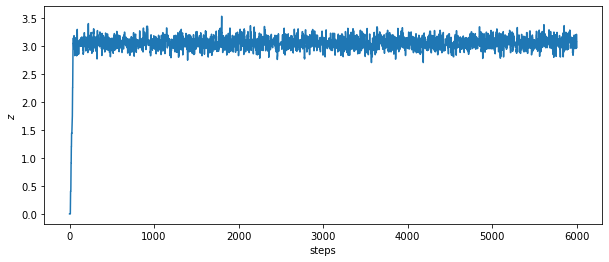

In [119]:
plt.figure(figsize=(10,4))
plt.plot(posterior, lw=1.5)
plt.xlabel('steps')
plt.ylabel('$z$')

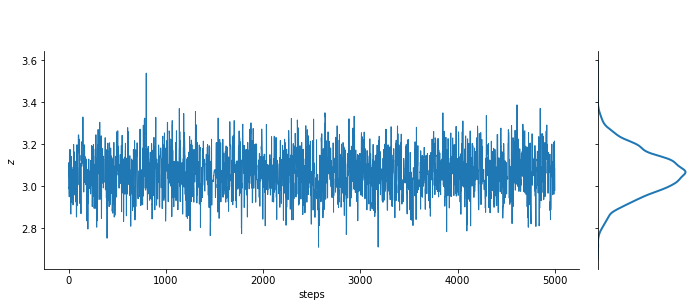

In [122]:
n_burnin = 1000
x, y = np.arange(n_iter - n_burnin), posterior[n_burnin:]

g = sns.JointGrid()
sns.lineplot(x=x, y=y, linewidth=1, ax=g.ax_joint)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
g.ax_joint.set_xlabel('steps')
g.ax_joint.set_ylabel('$z$')
g.ax_marg_x.set_axis_off()
g.fig.set_figwidth(10)
g.fig.set_figheight(4)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

Text(0, 0.5, 'z')

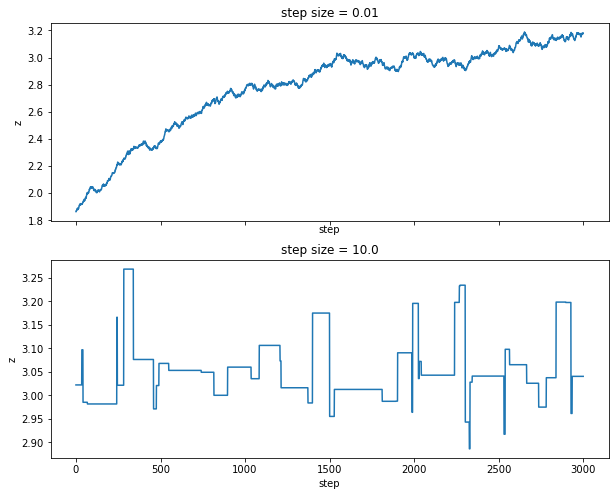

In [124]:
def randomwalk_MH(x_init, step_size=0.3, n_iter=6000, n_burnin=1000):
    x_current = x_init
    posterior = []
    
    for i in tqdm(range(n_iter)):
        # 撹乱項εは平均０の一様分布に従うとする
        x_proposal = x_current + step_size * np.random.uniform(-1, 1)

        logp_current = unnormalized_log_posterior(x_current)
        logp_proposal = unnormalized_log_posterior(x_proposal)
        # [0, 1]の一様分布からのサンプル
        r = np.random.rand()
        # メトロポリス・ヘイスティングス基準に従い、提案された値を受容するかどうか判定
        # logp_proposal > logp_currentなら必ず受容
        # logp_proposal < logp_currentの場合は、np.exp(logp_proposal - logp_current)の確率で受容
        if np.exp(logp_proposal - logp_current) > r:
            x_current = x_proposal
        posterior.append(x_current)
    return posterior[n_burnin:]

posterior_small_step = randomwalk_MH(0, 0.01, 4000, 1000)
posterior_large_step = randomwalk_MH(0, 10, 4000, 1000)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax = axes[0]
ax.plot(posterior_small_step)
ax.set_title('step size = 0.01')
ax.set_xlabel('step')
ax.set_ylabel('z')

ax = axes[1]
ax.plot(posterior_large_step)
ax.set_title('step size = 10.0')
ax.set_xlabel('step')
ax.set_ylabel('z')

MCMCが収束しない場合、典型的にはサンプルの自己相関が高くなっている。
サンプルの自己相関を確認するために、コレログラムを描画する。

Text(0, 0.5, 'autocorr')

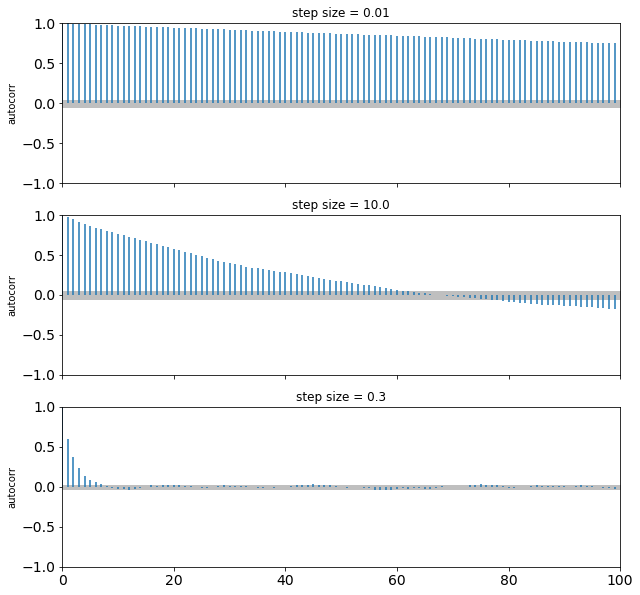

In [126]:
import arviz as az

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
ax = axes[0]
az.plot_autocorr(np.array(posterior_small_step[n_burnin:]), ax=ax)
ax.set_title('step size = 0.01')
ax.set_ylabel('autocorr')

ax = axes[1]
az.plot_autocorr(np.array(posterior_large_step[n_burnin:]), ax=ax)
ax.set_title('step size = 10.0')
ax.set_ylabel('autocorr')

ax = axes[2]
az.plot_autocorr(np.array(posterior[n_burnin:]), ax=ax)
ax.set_title('step size = 0.3')
ax.set_ylabel('autocorr')

MCMCが正しく収束したか同課の判断として、複数の初期値でMCMCを実施し、結果を比較するのが一般的である。
トレースプロットに複数のチェーンを描画し、これらがよく混ざり合っていることが望ましい。

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

Text(0.5, 0, 'z')

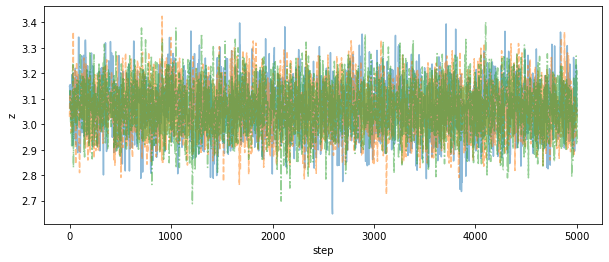

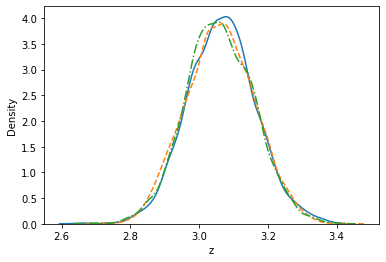

In [127]:
x_inits = np.random.uniform(-1, 1, 3)
posteriors = [randomwalk_MH(x_init) for x_init in x_inits]
posteriors = np.array(posteriors).transpose()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(posteriors[:,0], lw=1.5, alpha=0.5)
ax.plot(posteriors[:,1], lw=1.5, alpha=0.5, ls='--')
ax.plot(posteriors[:,2], lw=1.5, alpha=0.5, ls='-.')
ax.set_xlabel('step')
ax.set_ylabel('z')

fig, ax = plt.subplots()
sns.kdeplot(posteriors[:,0])
sns.kdeplot(posteriors[:,1], ls='--')
sns.kdeplot(posteriors[:,2], ls='-.')
ax.set_xlabel('z')